In [41]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import nltk


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:

# ====================
# 1. Preprocessing
# ====================
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [44]:
# ====================
# 2. Load Dataset
# ====================
# df = pd.read_csv("../scraping-result/dataset.csv")
df = pd.read_csv("../dataset/test-dataset.csv")
df.dropna(subset=["Review", "Rating"], inplace=True)
df["Label"] = df["Rating"].apply(lambda x: 1 if x >= 4 else 0)
df["CleanReview"] = df["Review"].apply(clean_text)

df.head(10)

,Username,Produk,Review,Rating,ReviewAt,Label,CleanReview
0,fpradipta,Jam Tangan Digital,"Sudah belanja beberapa kali, selalu puas.",4,2024-10-25,1,sudah belanja beberapa kali selalu puas
1,user_18560,Meja Belajar,Barang datang lebih cepat dari perkiraan.,4,2024-09-17,1,barang datang lebih cepat dari perkiraan
2,pranawafirmansyah,Tumbler Stainless,"Sudah belanja beberapa kali, selalu puas.",5,2025-02-28,1,sudah belanja beberapa kali selalu puas
3,user_16391,Makeup Set,Kualitas di atas ekspektasi saya!,4,2023-05-14,1,kualitas di atas ekspektasi saya
4,bakidinnatsir,Celana Jeans,"Produk bagus, bahan adem dan sesuai gambar.",4,2024-08-16,1,produk bagus bahan adem dan sesuai gambar
5,user_5022,Mouse Wireless,Produk sangat bagus dan sesuai deskripsi!,4,2024-01-01,1,produk sangat bagus dan sesuai deskripsi
6,kayun69,Powerbank 10000mAh,"Produk bagus, bahan adem dan sesuai gambar.",5,2024-08-21,1,produk bagus bahan adem dan sesuai gambar
7,user_13872,Makeup Set,Sudah komplain tapi tidak ada solusi.,2,2024-02-18,0,sudah komplain tapi tidak ada solusi
8,praboworahayu,Kemeja Polos,"Pengiriman cepat, packing rapi. Recommended!",5,2025-04-30,1,pengiriman cepat packing rapi recommended
9,user_10332,Celana Jeans,Harga terjangkau dengan kualitas oke.,5,2024-08-11,1,harga terjangkau dengan kualitas oke


In [45]:
# ====================
# 3. TF-IDF & Train-Test Split
# ====================
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df["CleanReview"])
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


d:\ulasCheck\venv\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [46]:
# ====================
# 4. Train Logistic Regression
# ====================
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n=== LOGISTIC REGRESSION REPORT ===")
print(classification_report(y_test, y_pred_log))
acc_log = accuracy_score(y_test, y_pred_log)



=== LOGISTIC REGRESSION REPORT ===
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       195
           1       1.00      0.99      1.00      1753

    accuracy                           0.99      1948
   macro avg       0.97      0.99      0.98      1948
weighted avg       0.99      0.99      0.99      1948



In [47]:

# ====================
# 5. Train SVM
# ====================
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n=== SVM REPORT ===")
print(classification_report(y_test, y_pred_svm))
acc_svm = accuracy_score(y_test, y_pred_svm)



=== SVM REPORT ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       1.00      1.00      1.00      1753

    accuracy                           1.00      1948
   macro avg       0.99      0.99      0.99      1948
weighted avg       1.00      1.00      1.00      1948



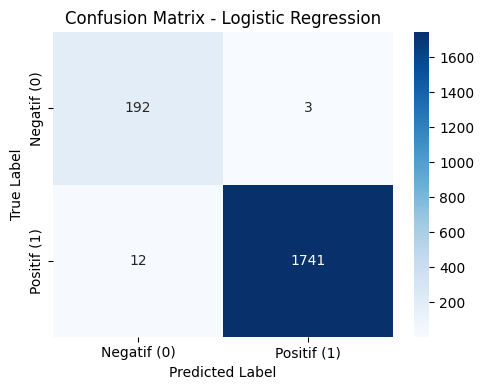

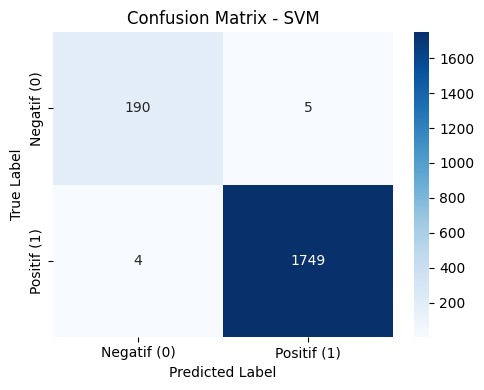

In [48]:

# ====================
# 6. Confusion Matrix
# ====================
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ["Negatif (0)", "Positif (1)"]
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


In [49]:
# ====================
# 7. Pilih Model Terbaik
# ====================
if acc_log >= acc_svm:
    best_model = log_model
    best_model_name = "Logistic Regression"
else:
    best_model = svm_model
    best_model_name = "SVM"

print(f"\n>>> Model terbaik: {best_model_name}")



>>> Model terbaik: SVM


In [50]:
# ====================
# 8. Prediksi Semua Data & Analisis Aspek Positif
# ====================
df["PredictedLabel"] = best_model.predict(X)

def analisis_aspek_positif(df, review_col='CleanReview', label_col='PredictedLabel'):
    aspek_keywords = {
        "pengiriman": ["pengiriman", "kirim", "sampai", "kurir", "antar", "cepat", "tepat waktu", "on time", "kilat"],
        "pelayanan": ["pelayanan", "respon cepat", "layanan", "cs", "ramah", "sopan", "penjual baik", "admin ramah"],
        "produk": ["produk", "barang", "kualitas bagus", "bagus", "asli", "ori", "original", "sesuai deskripsi"],
        "harga": ["harga", "murah", "diskon", "promo", "worth it", "terjangkau", "value"],
        "packing": ["packing", "kemasan", "rapi", "aman", "bubble wrap", "dibungkus rapi"]
    }

    aspek_counter = defaultdict(int)
    for _, row in df.iterrows():
        if row[label_col] == 1:
            review = row[review_col]
            for aspek, keywords in aspek_keywords.items():
                if any(kw in review for kw in keywords):
                    aspek_counter[aspek] += 1
    return aspek_counter

aspek_result = analisis_aspek_positif(df)


In [51]:
# ====================
# 9. Evaluasi Toko
# ====================
total_pos = (df["PredictedLabel"] == 1).sum()
total_neg = (df["PredictedLabel"] == 0).sum()
total_all = total_pos + total_neg
persen_pos = round((total_pos / total_all) * 100, 2)
toko_label = "Direkomendasikan" if persen_pos >= 60 else "Tidak Direkomendasikan"
aspek_tertinggi = max(aspek_result, key=aspek_result.get)
jumlah_tertinggi = aspek_result[aspek_tertinggi]
persen_tertinggi = round((jumlah_tertinggi / total_all) * 100, 2)

print("\n=== PENILAIAN TOKO ===")
print(f"- Total Ulasan: {total_all}")
print(f"- Positif: {total_pos} ({persen_pos}%)")
print(f"- Negatif: {total_neg} ({round((total_neg / total_all) * 100, 2)}%)")
print(f"- Label Toko: {toko_label}")
print(f"- Aspek yang menonjol (positif): '{aspek_tertinggi}' sebanyak {jumlah_tertinggi} review ({persen_tertinggi}%)")



=== PENILAIAN TOKO ===
- Total Ulasan: 9739
- Positif: 8643 (88.75%)
- Negatif: 1096 (11.25%)
- Label Toko: Direkomendasikan
- Aspek yang menonjol (positif): 'produk' sebanyak 3266 review (33.54%)


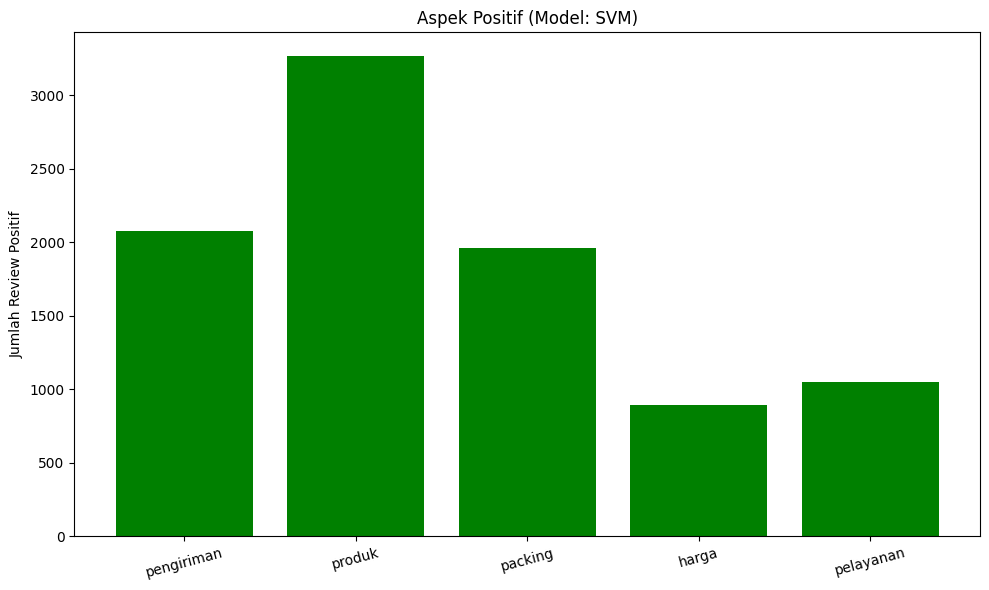

In [52]:
# ====================
# 10. Visualisasi Aspek Positif
# ====================
labels = list(aspek_result.keys())
counts = [aspek_result[k] for k in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='green')
plt.ylabel("Jumlah Review Positif")
plt.title(f"Aspek Positif (Model: {best_model_name})")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
